In [8]:
#Linear Discriminant Analysis

# probabilistic model per class
# classified by calculating the conditional probability of it belonging to each class
# and selecting the class with the highest probability.

# https://people.revoledu.com/kardi/tutorial/LDA/Numerical%20Example.html


#A classifier with a linear decision boundary, generated by fitting class conditional densities to the data 
# and using Bayes’ rule.

#The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.

#The fitted model can also be used to reduce the dimensionality of the input by projecting it to 
# the most discriminative directions, using the transform method.

In [9]:
#Linear discriminant analysis is supervised machine learning, 
#the technique used to find a linear combination of features that separates two or more classes of objects or events.


#  LDA can be applied to two or more than two-class classification problems.

# LDA is also a dimensionality reduction technique.



# The goal of LDA is to discriminate different classes in low dimensional space by 
#    retaining the components containing feature values 
#    that have the best separation across classes.

#Both PCA and LDA are linear transformation techniques. However, 
#PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

In [1]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [3]:
from sklearn.preprocessing import LabelEncoder

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}



In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

In [5]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

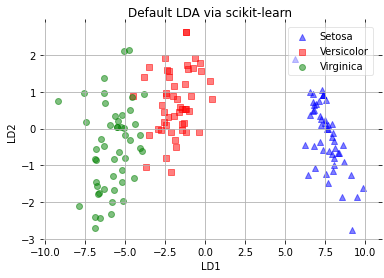

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [13]:
data=pd.DataFrame(X_lda_sklearn)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,8.084953,0.328454,1
1,7.147163,-0.755473,1
2,7.511378,-0.238078,1
3,6.837676,-0.642885,1
4,8.157814,0.540639,1


In [14]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])